In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import io
import re
from scipy.io.wavfile import read
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
from datetime import datetime, timezone
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [213]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        # Check for missing commas and insert them
        pattern = r'(\{[^{}]*"[^"]*"[^{}]*\})(?=[^{}]*\{)'
        data = re.sub(pattern, r'\1,', data)

        obj = data[data.find('{') : data.rfind('}')+1]
        
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data
    return []


In [214]:
dirpaths = ["C://Users//Dave//Desktop//MACHINEL2//positive"]#,"C://Users//Dave//Desktop//MACHINEL2//negative",
           # "C://Users//Dave//Desktop//MACHINEL2//unclassified"]


In [215]:
dataframes = []

for dirpath in dirpaths:
    for filename in os.listdir(dirpath):
        if filename.endswith(".js"):
            filepath = os.path.join(dirpath, filename)
            waveform = load_waveform(filepath)
           # if not waveform.empty:
            dataframes.append(waveform)

'''
 #code below to check for file errors, typos
for filepath in filepaths:
    try:
        waveform = load_waveform(filepath)
    except Exception as e:
        print(f"Error in file {filepath}: {e}") #neg file, 1361888
'''


'\n #code below to check for file errors, typos\nfor filepath in filepaths:\n    try:\n        waveform = load_waveform(filepath)\n    except Exception as e:\n        print(f"Error in file {filepath}: {e}") #neg file, 1361888\n'

In [216]:

pdf = dataframes[0]
#ndf = dataframes[1]
#udf = dataframes[2]


pdf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]
#ndf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]
#udf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]


In [217]:
np.where(pd.isnull(pdf))
np.where(pd.isnull(ndf))
np.where(pd.isnull(udf))


(array([], dtype=int64), array([], dtype=int64))

In [218]:
for dirpath in dirpaths:
    for filename in os.listdir(dirpath):
        if filename.endswith(".js"):
            filepath = os.path.join(dirpath, filename)
            waveform = load_waveform(filepath)

            # Check if 'phase_angle' and 'peak_amplitude' columns exist in the DataFrame
            if 'phase_angle' in waveform.columns and 'peak_amplitude' in waveform.columns:
                # Create a scatter plot for the current waveform
                plt.scatter(waveform['phase_angle'], waveform['peak_amplitude'], s=8, cmap=cmx.plasma)

                # Set title, labels, and limits (optional)
                plt.title("Phase Angle vs Peak Amplitude")
                plt.xlabel("Phase Angle")
                plt.ylabel("Peak Amplitude")
                plt.xlim(-180, 180)
                plt.ylim(0, 1)

                # Create output directory if it doesn't exist
                output_dir = "C://Users//Dave//Desktop//MACHINEL2//Positivegraphs"
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                # Save the plot as an image in the specified output directory
                output_filename = os.path.splitext(filename)[0] + '.png'  # Change the extension to .png
                output_path = os.path.join(output_dir, output_filename)
                plt.savefig(output_path)

                # Add print statements to show the output directory and saved file path
                print("Output directory:", output_dir)
                print("Saved file:", output_path)   

                # Clear the current figure to prevent plots from overlapping
                plt.clf()

C:\Users\Dave\AppData\Local\Temp\ipykernel_19048\904320017.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ndf['cycle_number'],ndf['integral'], s=8, cmap=cmx.plasma)


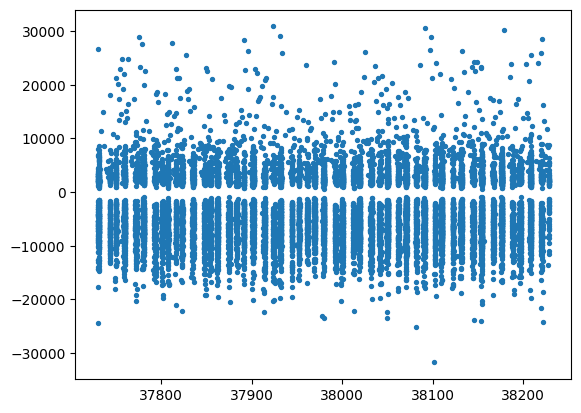

In [219]:
plt.scatter(ndf['cycle_number'],ndf['integral'], s=8, cmap=cmx.plasma)


plt.show()

C:\Users\Dave\AppData\Local\Temp\ipykernel_19048\3257962712.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pdf['pulse_width'],pdf['rise_time'], s=8, cmap=cmx.plasma)


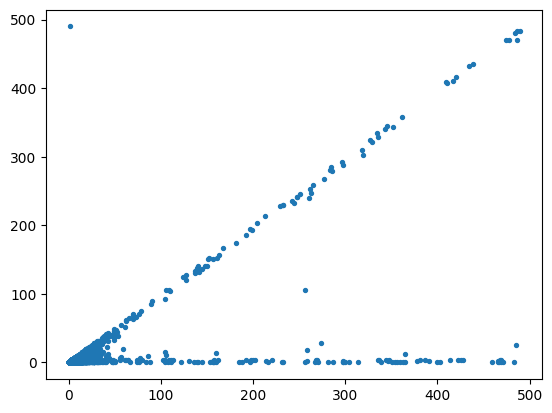

In [220]:
plt.scatter(pdf['pulse_width'],pdf['rise_time'], s=8, cmap=cmx.plasma)


plt.show()

In [221]:
selected_features = ["phase_angle", "peak_amplitude"]
X = pdf[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [222]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [223]:
pdf["cluster"] = dbscan.labels_

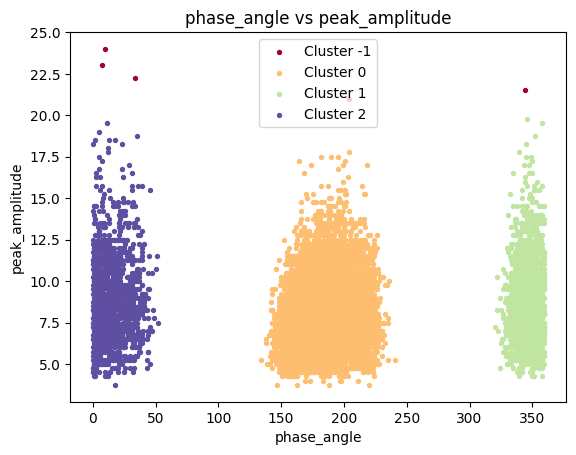

In [224]:
# Function to create a scatter plot with different colors for each cluster
def plot_dbscan_clusters(data, x_feature, y_feature, cluster_column):
    unique_clusters = np.unique(data[cluster_column])
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

    for cluster, color in zip(unique_clusters, colors):
        cluster_data = data[data[cluster_column] == cluster]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c=[color], s=8, label=f"Cluster {cluster}")

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
    plt.legend()
    plt.show()

# Create a scatter plot with different colors for each DBSCAN cluster and noise points
plot_dbscan_clusters(pdf, "phase_angle", "peak_amplitude", "cluster")

In [225]:
selected_features = ["phase_angle", "peak_amplitude"]
X = ndf[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.1, min_samples=20)
dbscan.fit(X_scaled)
ndf["cluster"] = dbscan.labels_

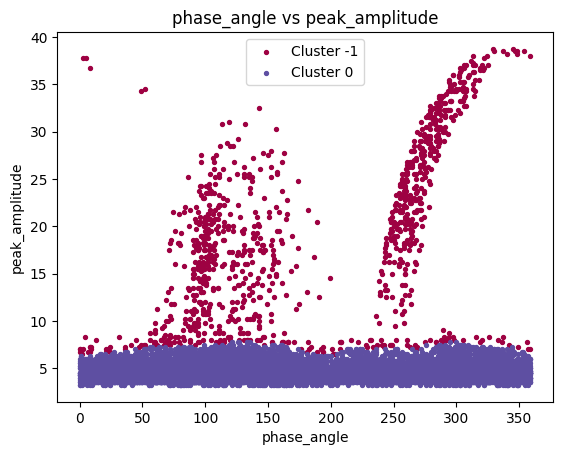

In [226]:
plot_dbscan_clusters(ndf, "phase_angle", "peak_amplitude", "cluster")

In [227]:
selected_features = ["phase_angle", "peak_amplitude"]
X = udf[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.1, min_samples=20)
dbscan.fit(X_scaled)
udf["cluster"] = dbscan.labels_

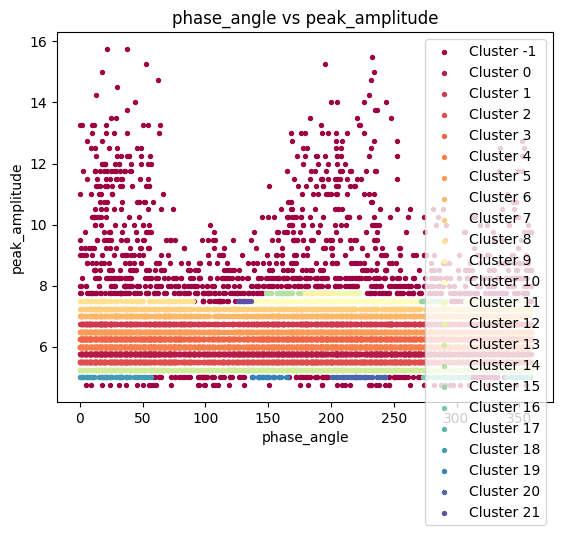

In [228]:

plot_dbscan_clusters(udf, "phase_angle", "peak_amplitude", "cluster")

In [229]:
def plot_optics_clusters(df, x_col, y_col, cluster_col):
    # Create a scatter plot of the data with clusters colored differently
    plt.figure(figsize=(12, 8))
    plt.scatter(df[x_col], df[y_col], c=df[cluster_col], cmap='viridis', s=50)
    
    # Add labels and a legend
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.colorbar(label=cluster_col)
    
    plt.show()

In [230]:
# Get the cluster labels
scaler = StandardScaler()
scaled_pdf = scaler.fit_transform(pdf)
# Create an instance of OPTICS with desired parameters
optics = OPTICS(min_samples=4, xi=0.05, min_cluster_size=4)

# Fit the model to the scaled data
optics.fit(scaled_pdf)
# Get the cluster labels
labels = optics.labels_

# Add the cluster labels to the original pdf DataFrame
pdf['cluster'] = labels

# Analyze the results
print(pdf['cluster'].value_counts())

-1      9577
 99       15
 36       15
 181      14
 295      14
        ... 
 33        4
 381       4
 120       4
 166       4
 144       4
Name: cluster, Length: 455, dtype: int64


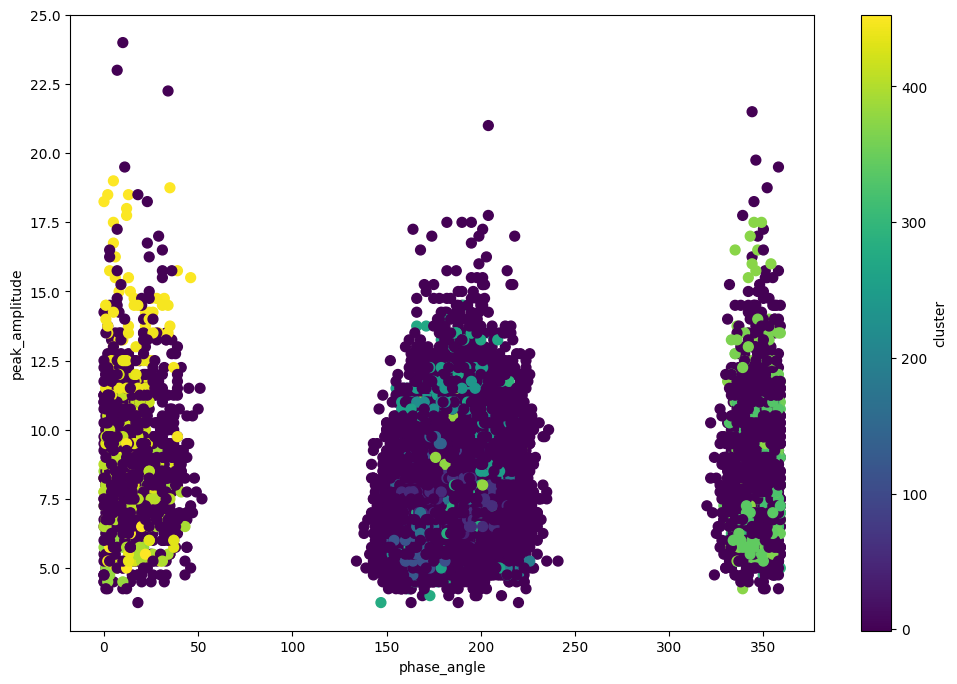

In [231]:
plot_optics_clusters(pdf, "phase_angle", "peak_amplitude", "cluster")